In [1]:
#Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy.constants import pi, R

In [2]:
#Defining functions for heat capacity of a metal at low temperature
def heat(T, gamma, beta): #Model for Cv vs T
    return gamma*T + beta*T**3
def C_over_T(T, gamma, beta):  #Model for linear model Cv/T vs T^2
    return gamma + beta*T**2

In [3]:
#Simulation of Cv Measurements w/ noise

#Set gamma for desired metal
gamma = 0.695   # mj/(mol*K^2)

#Set Debye temperature for desired material
Debye = 343   # Kelvin

#beta is calculated and printed to compare fitted value
beta = (12 * pi**4 * R)/(5*Debye**3)*1000  # scaled to mj/(mol*K^4)
print('\u03B2 = ',beta)

#Parameters for simulation; n determines both number of trials and temperature values
n= 50
T = np.linspace(0.5, 10, n)


Cv_mean = []
Cv_std = []

CvT_mean = []
CvT_std = []

# Simulate measurements
for i in T:
    T_exp = i + np.random.normal(0, 0.05) #adds noise to temperature to simulate experimental uncertainty
    C = heat(T_exp, gamma, beta)
    Cv = C + np.random.normal(0, 0.015*C, n) #adds noise to heat capactiy measurements 
    CvT = Cv/T_exp

#Stores mean and standard deviation of Cv and Cv/T for each temperature 
    Cv_mean.append(Cv.mean())
    Cv_std.append(Cv.std())
    CvT_mean.append(CvT.mean())
    CvT_std.append(CvT.std())
    
# Set up arrays
T = np.array(T)
T_square = np.array(T)**2
Cv_mean = np.array(Cv_mean)
Cv_std = np.array(Cv_std)
CvT_mean = np.array(CvT_mean)
CvT_std = np.array(CvT_std)



β =  0.04816843734770408


In [4]:
#Comparison of Simulation to Model values (Cv)
Cv_model = heat(T, gamma, beta)

Cv_comparison = pd.DataFrame({
    "Temperature (K)": T,
    "Simulated Cv Mean (mJ/mol·K)": Cv_mean,
    "Model Cv (mJ/mol·K)": Cv_model
})

Cv_comparison["Relative Error (%)"] = 100 * abs(
    (Cv_comparison["Simulated Cv Mean (mJ/mol·K)"] - Cv_comparison["Model Cv (mJ/mol·K)"]) /
    Cv_comparison["Model Cv (mJ/mol·K)"]
)

# Add relative error column
Cv_comparison["Relative Error (%)"] = 100 * abs((Cv_comparison["Simulated Cv Mean (mJ/mol·K)"] - Cv_comparison["Model Cv (mJ/mol·K)"]) / Cv_comparison["Model Cv (mJ/mol·K)"])

display(Cv_comparison)

# Save to CSV
Cv_comparison.to_csv("data/Cv_comparison.csv", index=False)


,Temperature (K),Simulated Cv Mean (mJ/mol·K),Model Cv (mJ/mol·K),Relative Error (%)
0,0.500000,0.302220,0.353521,14.511376
1,0.693878,0.435276,0.498337,12.654281
2,0.887755,0.674197,0.650691,3.612581
3,1.081633,0.883517,0.812689,8.715325
4,1.275510,1.071981,0.986437,8.672079
5,1.469388,1.158152,1.174042,1.353383
6,1.663265,1.376408,1.377609,0.087206
7,1.857143,1.551267,1.599245,3.000013
8,2.051020,1.871736,1.841056,1.666418
9,2.244898,2.078917,2.105149,1.246055


In [5]:
#Comparison of simulation to theoretical values (Cv/T)
CvT_theoretical = C_over_T(T, gamma, beta)

CvT_comparison = pd.DataFrame({
    "Temperature (K)": T,
    "Simulated Cv/T Mean (mJ/mol·K)": CvT_mean,
    "Model Cv/T (mJ/mol·K)": CvT_theoretical
})

CvT_comparison["Relative Error (%)"] = 100 * abs(
    (CvT_comparison["Simulated Cv/T Mean (mJ/mol·K)"] - CvT_comparison["Model Cv/T (mJ/mol·K)"]) /
    CvT_comparison["Model Cv/T (mJ/mol·K)"]
)

# Add relative error column
CvT_comparison["Relative Error (%)"] = 100 * abs((CvT_comparison["Simulated Cv/T Mean (mJ/mol·K)"] - CvT_comparison["Model Cv/T (mJ/mol·K)"]) / CvT_comparison["Model Cv/T (mJ/mol·K)"])

display(CvT_comparison)

# Save to CSV
CvT_comparison.to_csv("data/Cv_T_comparison.csv", index=False)


,Temperature (K),Simulated Cv/T Mean (mJ/mol·K),Model Cv/T (mJ/mol·K),Relative Error (%)
0,0.500000,0.705760,0.707042,0.181282
1,0.693878,0.714883,0.718191,0.460615
2,0.887755,0.736005,0.732962,0.415135
3,1.081633,0.760027,0.751354,1.154405
4,1.275510,0.784400,0.773366,1.426731
5,1.469388,0.798301,0.799000,0.087505
6,1.663265,0.830027,0.828256,0.213910
7,1.857143,0.852087,0.861132,1.050306
8,2.051020,0.900808,0.897629,0.354096
9,2.244898,0.932695,0.937748,0.538838


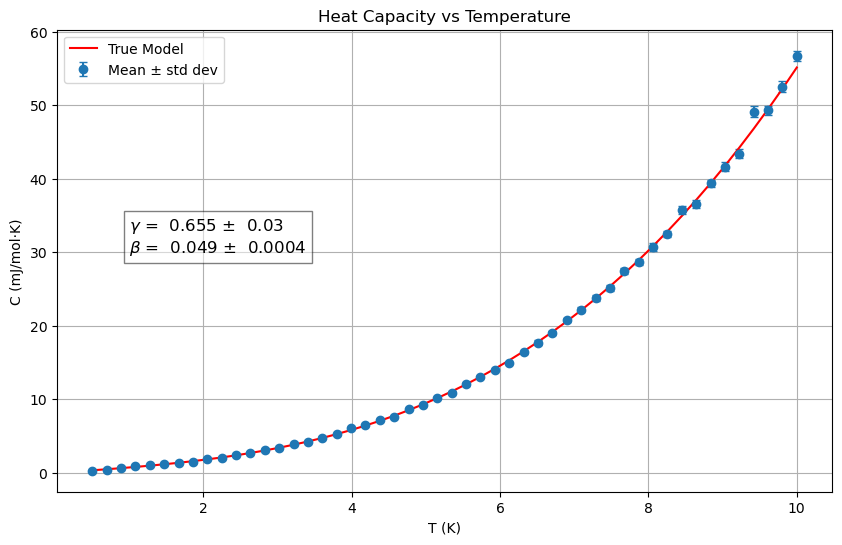

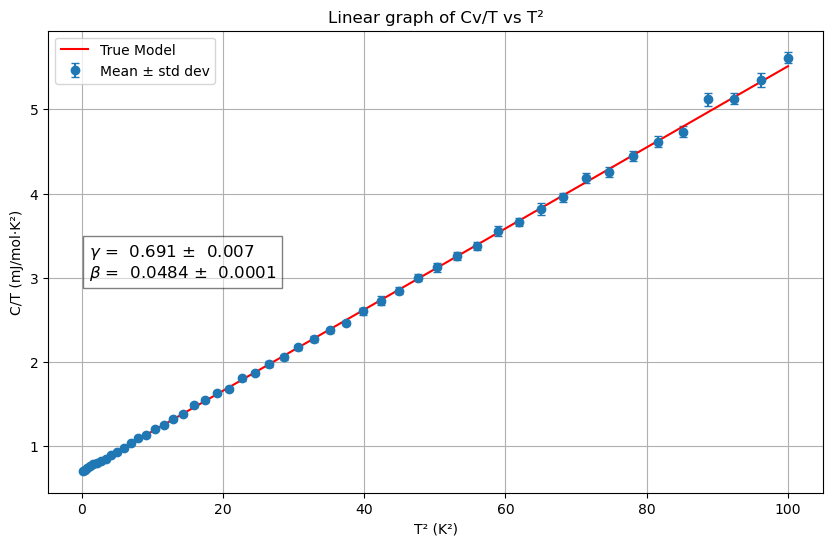

In [6]:
#Curve Fits and Plots

 #Fit for Cv vs T
popt1, pcov1 = curve_fit(heat, T, Cv_mean, p0 = [.5, .05])
gamma1_fit, beta1_fit = popt1
gamma1_err, beta1_err = np.sqrt(np.diag(pcov1))

#Fit for Cv/T vs T^2
popt2, pcov2 = curve_fit(C_over_T, T, CvT_mean, p0 = [.5, .05])
gamma2_fit, beta2_fit = popt2
gamma2_err, beta2_err = np.sqrt(np.diag(pcov2))

#Plotting data
plt.figure(figsize=(10, 6))
plt.errorbar(T, Cv_mean, yerr=Cv_std, fmt='o', capsize=3, label="Mean ± std dev")
plt.plot(T, heat(T, gamma, beta), label="True Model", color='red')
plt.xlabel("T (K)")
plt.ylabel("C (mJ/mol·K)")
plt.title("Heat Capacity vs Temperature")
fit_text = f'$\\gamma$ = {gamma1_fit: .3} ± {gamma1_err: .1}\n$\\beta$ = {beta1_fit: .3} ± {beta1_err: .1}'
plt.text(1, 30, fit_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.5, edgecolor = 'black'))
plt.grid(True)
plt.legend()
plt.savefig("Figures/heat_capacity_fit.png", dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(10, 6))
plt.errorbar(T_square, CvT_mean, yerr=CvT_std, fmt='o', capsize=3, label="Mean ± std dev")
plt.plot(T**2, heat(T, gamma, beta)/T, label="True Model", color='red')
plt.xlabel("T\u00b2 (K\u00b2)")
plt.ylabel("C/T (mJ/mol·K\u00b2)")
plt.title("Linear graph of Cv/T vs T\u00b2")
fit_text = f'$\\gamma$ = {gamma2_fit: .3} ± {gamma2_err: .1}\n$\\beta$ = {beta2_fit: .3} ± {beta2_err: .1}'
plt.text(1, 3, fit_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.5, edgecolor = 'black'))
plt.grid(True)
plt.legend()
plt.savefig("Figures/heat_capacity_over_T_fit.png", dpi=300, bbox_inches='tight')
plt.show()

In [7]:
#Simulation check by returning Debye temperature

#Debye temperature from Cv Fit 

beta = popt1[1]*1e-3 #Scaled to J/(mol*k^4)
beta_err = np.sqrt(pcov1[1, 1]) * 1e-3
A = ((12 * pi**4 * R) / 5) ** (1/3)

T_D = A * beta ** (-1/3)
T_D_err = (1/3) * A * beta ** (-4/3) * beta_err

print(f"Debye temperature: {T_D:.2f} ± {T_D_err:.2f} K")

Debye temperature: 340.94 ± 0.90 K


In [8]:
#Debye temperature from Cv/T fit

beta = popt2[1] * 1e-3 #Scaled to J/(mol*k^4)
beta_err = np.sqrt(pcov2[1, 1]) * 1e-3
A = ((12 * pi**4 * R) / 5) ** (1/3)

T_D = A * beta ** (-1/3)
T_D_err = (1/3) * A * beta ** (-4/3) * beta_err

print(f"Debye temperature: {T_D:.2f} ± {T_D_err:.2f} K")

Debye temperature: 342.52 ± 0.35 K


In [9]:
#Assess goodness of fits

#Cv fit
residuals1 = Cv_mean - heat(T, *popt1)
chi_squared1 = np.sum((residuals1 / Cv_std) ** 2)
dof1 = len(Cv_mean) - len(popt1)
reduced_chi_squared1 = chi_squared1 / dof1

print(f"Chi-squared (Cv): {chi_squared1:.2f}")
print(f"Reduced Chi-squared (Cv): {reduced_chi_squared1:.2f}")

# C_over_T fit
residuals2 = CvT_mean - C_over_T(T, *popt2)
chi_squared2 = np.sum((residuals2 / CvT_std) ** 2)
dof2 = len(CvT_mean) - len(popt2)
reduced_chi_squared2 = chi_squared2 / dof2

print(f"Chi-squared (Cv/T): {chi_squared2:.2f}")
print(f"Reduced Chi-squared (Cv/T): {reduced_chi_squared2:.2f}")

Chi-squared (Cv): 434.71
Reduced Chi-squared (Cv): 9.06
Chi-squared (Cv/T): 22.92
Reduced Chi-squared (Cv/T): 0.48
